In [62]:
#data Manipulation
import pandas as pd

#Mathematical operation
import numpy as np

#data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Ml Algoriothm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\advertising (1).csv")

In [39]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


## In this dataset has 200 rows and 4 columns

In [42]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [43]:
df.duplicated().sum()

0

<Axes: >

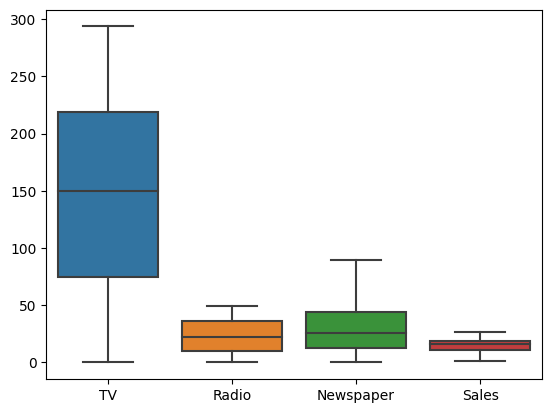

In [48]:
sns.boxplot(df)

## from above graph Newspaper has 2 outliers

In [49]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [46]:
df[df['Newspaper']==df.Newspaper.max()].index  # find the outliers

Index([16], dtype='int64')

In [47]:
df.drop([16,101],inplace = True)   #Drop the outliers

<Figure size 600x600 with 0 Axes>

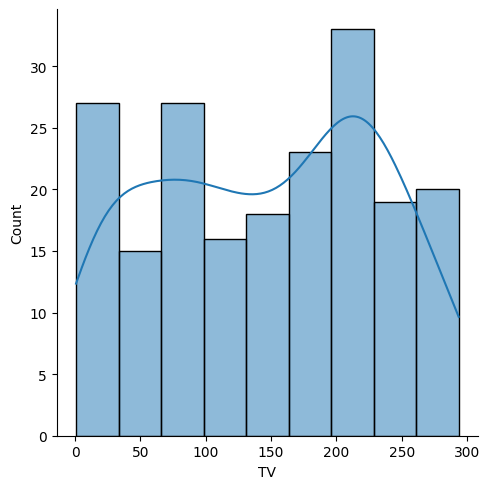

<Figure size 600x600 with 0 Axes>

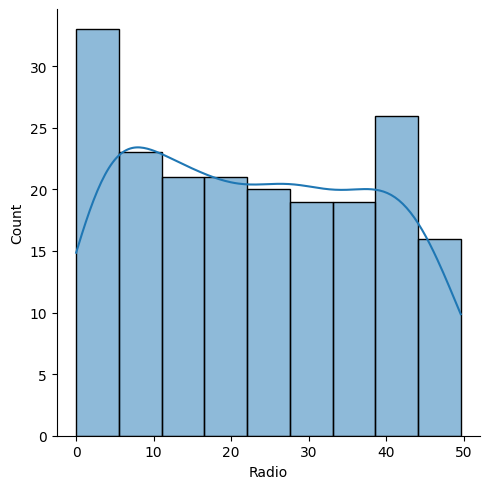

<Figure size 600x600 with 0 Axes>

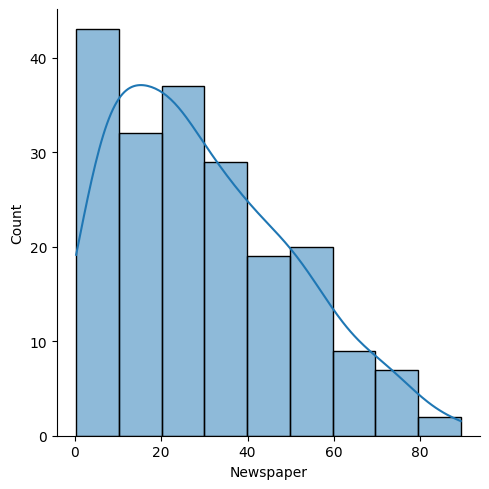

<Figure size 600x600 with 0 Axes>

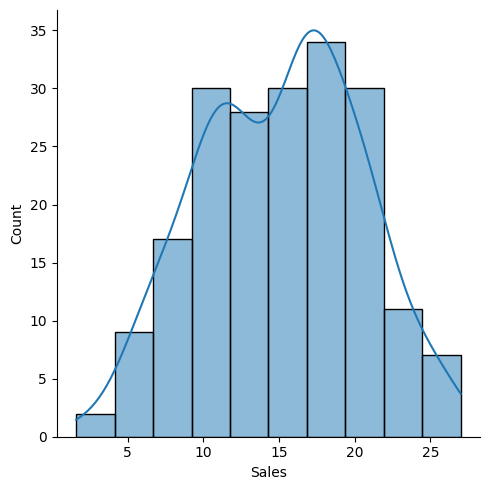

In [50]:
columns = ['TV', 'Radio', 'Newspaper', 'Sales']
for i in range(len(columns)):
    plt.figure(figsize=(6,6))
    sns.displot(df[columns[i]],kde = True)

<Axes: >

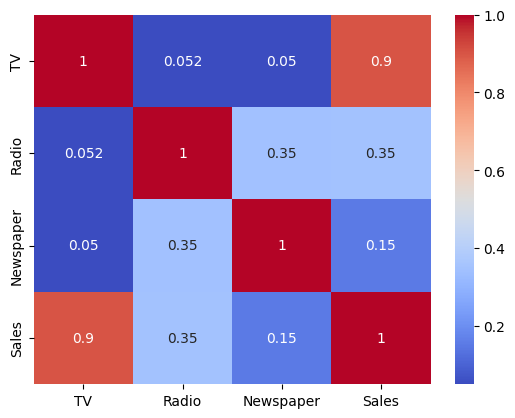

In [65]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Modeling

In [51]:
x=df[['TV', 'Radio', 'Newspaper']]
y =df[['Sales']]

In [69]:
# Split the datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =1)

In [53]:
reg = linear_model.LinearRegression()
# fit the model
reg.fit(x_train,y_train)

LinearRegression()

In [54]:
regp = reg.predict(x_test)

In [66]:
regp   #Predicted values

array([[14.898954  ],
       [18.01301489],
       [21.60828956],
       [ 6.10005352],
       [23.45351448],
       [21.18738499],
       [16.21105676],
       [15.67262309],
       [24.09603973],
       [21.95221318],
       [22.59934137],
       [15.41974849],
       [19.40644996],
       [17.81440058],
       [ 9.71698786],
       [ 7.19986021],
       [ 9.58945887],
       [24.52426101],
       [16.25313767],
       [19.73078175],
       [21.1618739 ],
       [24.56217675],
       [16.78305297],
       [12.12000296],
       [10.0628797 ],
       [12.58133218],
       [21.45088236],
       [10.01680509],
       [14.87239754],
       [21.57058296],
       [18.93345501],
       [ 9.43619686],
       [ 7.66343503],
       [12.72527906],
       [21.89177877],
       [20.67127548],
       [ 9.63069732],
       [20.50740932],
       [11.85543776],
       [15.20221368],
       [22.04650091],
       [ 5.14144239],
       [14.29445752],
       [19.4672728 ],
       [12.23346839],
       [19

## I use line plot to find linearity between Tv column and Predicted output

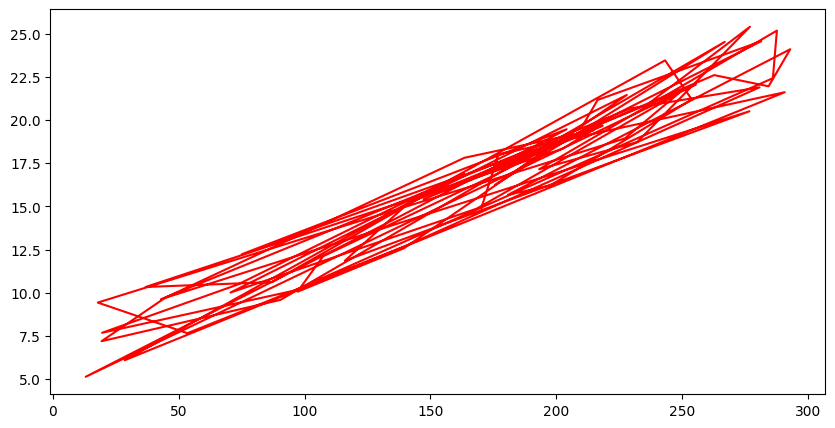

In [58]:
plt.figure(figsize=(10,5))
plt.plot(x_test.TV,regp,color='red')
plt.show()

## I use line plot to find linearity between Radio column and Predicted output

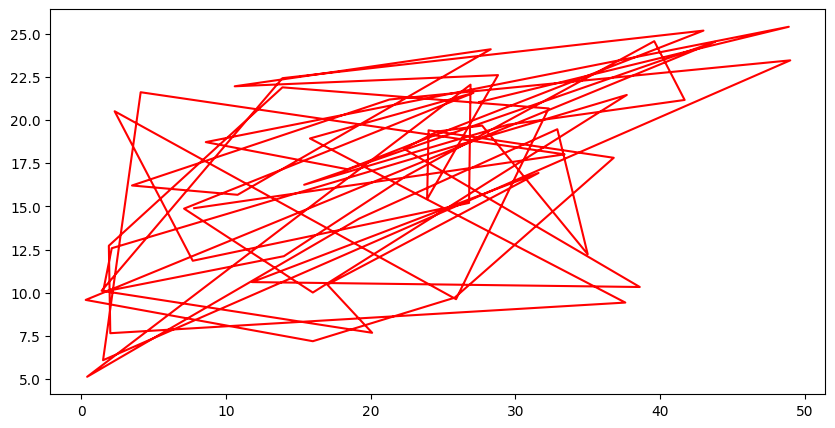

In [59]:
plt.figure(figsize=(10,5))
plt.plot(x_test.Radio,regp,color='red')
plt.show()

## I use line plot to find linearity between Newspaper column and Predicted output

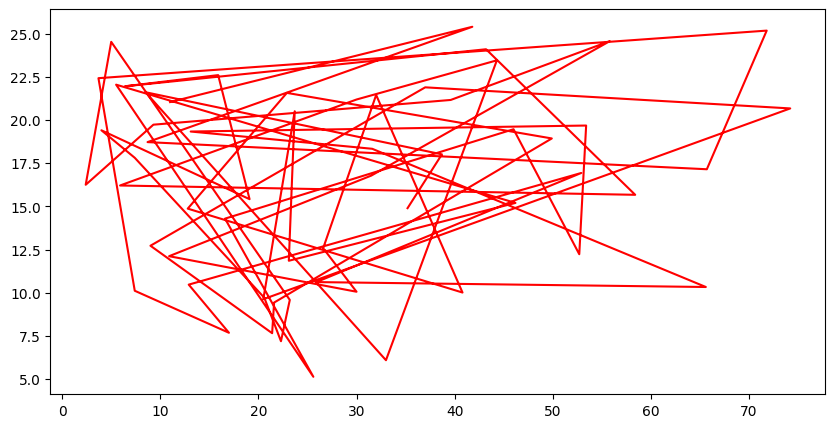

In [60]:
plt.figure(figsize=(10,5))
plt.plot(x_test.Newspaper,regp,color='red')
plt.show()

In [70]:
# Finding Root Mean Square Error of the model
rmse = np.sqrt(mean_squared_error(y_test,regp))
print("RMSE: ",rmse)

RMSE:  1.8305714581828016
